In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path

def parse_tf_events_file(filename):
    avg_returns = []
    for e in tf.train.summary_iterator(filename):
        for v in e.summary.value:
            if v.tag == 'Train_AverageReturn':
                avg_returns.append(v.simple_value)

    return avg_returns


/Users/Gabriel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Gabriel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Gabriel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Gabriel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.

In [24]:
def plot(file_name, lst_avg_names_returns, horizontal_line, save=True):
    '''
        Params:
        file_name: string that will be the name of the title in the plot.
        lst_avg_returns: A list of tuples of average returns and std returns
            [(avg_returns, name), (avg_returns, name2), ... (avg_return_of_all_lines, avg)]
        horizontal_line: int where the horizontal line should be or None if no horizontal line should be present.
    '''
    assert len(lst_avg_names_returns[0]) == 2, 'lst_avg_names should contain averages, and a name'
    plt.figure()
    plt.title(file_name)
    plt.xlabel('Iterations (in thousands)')
    for i in range(len(lst_avg_names_returns)-1):
        avg_returns = lst_avg_names_returns[i][0]
        name = lst_avg_names_returns[i][1]
        plt.plot(avg_returns, label=name, linestyle=':')

    avg_returns, name = lst_avg_names_returns[-1]
    plt.plot(avg_returns, label=name, color='b')    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if horizontal_line is not None:
        plt.axhline(y=horizontal_line, color='r', linestyle='-', label='Goal: {}'.format(horizontal_line))
    if save:
        plt.savefig(file_name + '.png', bbox_inches="tight")
    plt.show()

def get_name(path, batch):
    dirs = path.split('/')
    if batch:
        path_name = dirs[-3] + "_" + dirs[-2]
    else:
        path_name = dirs[-3] + "_" + dirs[-2].split('_')[1]
    return path_name

def average_of_all_runs(lst): 
    assert len(lst) > 0 and len(lst[0]) == 2, 'lst_avg_names should contain averages, a name'
    import numpy as np 
    l = np.array(lst)
    print(l.shape)
    averages = np.array([np.array(i[0]) for i in lst])
    return (np.average(averages, axis=0), 'Averages of All Runs')
    
    
def get_data(path, batch, obj):
    paths = []
    for dirpath, dirnames, filenames in os.walk(path):
        for filename in [f for f in filenames if 'events.out.tfevents' in f]:
            if obj in dirpath:
                paths.append(os.path.join(dirpath, filename))
    lst_avg_names = [(parse_tf_events_file(path), get_name(path, batch)) for path in paths]
    return lst_avg_names



In [3]:
open('hi.txt','r').read()

'/Users/Gabriel/Desktop/berkeley/2019-20/semester 1/classes/cs285/homeworks/hw03/hw/hw3/cs285/scripts\n'

In [4]:
path = '../data/'

In [5]:
lst_avg_std_names = get_data(path,True, 'lunarlander-REAL')

In [6]:
ev = os.listdir(path)[0]

In [7]:
lst_avg_std_names

[([-175.63380432128906,
   -136.29953002929688,
   -114.70935821533203,
   -113.26192474365234,
   -110.24193572998047,
   -89.19039916992188,
   -76.74140167236328,
   -79.89692687988281,
   -91.10657501220703,
   -76.62825775146484,
   -59.552940368652344,
   -44.10083770751953,
   -17.77269744873047,
   13.39476490020752,
   34.201473236083984,
   53.66668701171875,
   92.50035858154297,
   119.81947326660156,
   129.91868591308594,
   138.08853149414062,
   140.082763671875,
   139.4755401611328,
   143.8298797607422,
   150.9500274658203,
   140.80947875976562,
   159.29168701171875,
   174.39215087890625,
   193.8333282470703,
   190.96510314941406,
   209.10928344726562,
   206.66514587402344,
   204.2049560546875,
   202.84500122070312,
   207.20217895507812,
   201.24317932128906,
   191.95791625976562,
   178.50877380371094,
   142.38743591308594,
   21.18877601623535,
   9.698548316955566,
   30.24675941467285,
   22.752492904663086,
   21.39580726623535,
   -14.396326065063

In [8]:
lst_avg_std_names.append(average_of_all_runs(lst_avg_std_names))

(4, 2)


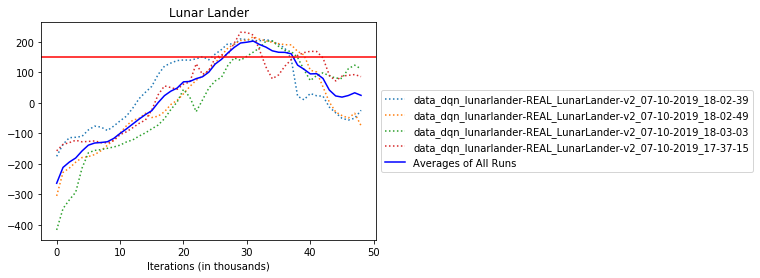

In [25]:
plot('Lunar Lander', lst_avg_std_names, 150, save=True)